<a href="https://colab.research.google.com/github/whale1510/KSEB_AI_proj/blob/main/modules/score_ocr_detecting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 야구 스코어를 인식하는 ocr 모델 모듈
- name : 조병웅
- project : 야구 AI 캐스터
- stack :  pytesseract(0.3.10), openCV(3.10.12), python(3.9.5), numpy

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y libtesseract-dev
!pip install pytesseract
!pip install opencv-python-headless

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,258 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,410 kB]
Get:13 http://archive.ubuntu.com/u

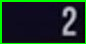

인식된 숫자들:
2 


In [ ]:
import cv2
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow


# Tesseract 설정 (Windows 사용자)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    return thresh

def detect_and_recognize_digits(image):
    preprocessed = preprocess_image(image)

    # 윤곽선 찾기
    contours, _ = cv2.findContours(preprocessed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    digit_regions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # 너무 작거나 큰 영역 제외 (이미지 크기에 따라 조정 필요)
        if 20 < w < 200 and 30 < h < 200:
            digit_regions.append((x, y, w, h))

    recognized_digits = []
    for region in digit_regions:
        x, y, w, h = region
        roi = preprocessed[y:y+h, x:x+w]

        # OCR 수행
        config = r'--oem 3 --psm 10 outputbase digits'
        digit = pytesseract.image_to_string(roi, config=config).strip()

        if digit.isdigit():
            recognized_digits.append((digit, (x, y, w, h)))

    return recognized_digits

# 이미지 파일 경로
image_path = '/content/test_9.JPG'  # 실제 이미지 파일 경로로 변경해주세요

# 이미지 읽기
image = cv2.imread(image_path)

if image is None:
    print("이미지를 불러올 수 없습니다. 파일 경로를 확인해주세요.")
else:
    # 숫자 검출 및 인식
    digits = detect_and_recognize_digits(image)

    # 결과 표시
    for digit, (x, y, w, h) in digits:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, digit, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # 결과 이미지 표시
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # 인식된 숫자 출력
    print("인식된 숫자들:")
    for digit, _ in digits:
        print(digit, end=' ')
    print()

    # 결과 이미지 저장 (선택사항)
    # cv2.imwrite('result.jpg', image)

In [ ]:
from PIL import Image
import pytesseract

# 이미지 파일로부터 텍스트 추출
image = Image.open('/content/test_9.JPG')
text = pytesseract.image_to_string(image,lang='kor+eng')
print(text)

------------------------------------------------------------------
